In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
hp = pd.read_csv('hp_data.csv')
hp.head()

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [10]:
# Feature Enginerring
y = hp.price
X = hp.loc[:,['sqft', 'floor', 'totalFloor', 'yearsOld']]
type(X)

pandas.core.frame.DataFrame

In [11]:
# Training-Testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=10)

In [12]:
# linear regression model object
model = LinearRegression()

In [13]:
# Fit the linear regression line with the data
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Predictig test data
ypredict = model.predict(Xtest)

In [11]:
# Check the linear regression R2-Score
r2_score(ytest,ypredict)

0.8626741090701253

In [12]:
# Test the skewness of the data
stats.skew(hp.totalFloor)

2.1940707077938395

In [13]:
# Test the Kurtosis
stats.kurtosis(hp.totalFloor)

3.988906140538009

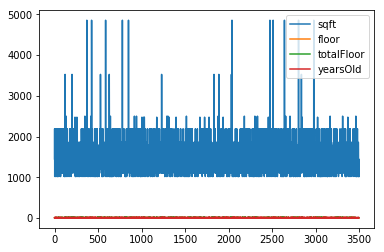

In [14]:
# Plotting the data to check for outlier
X.plot()

In [15]:
# Scaling down the sqft
from sklearn.preprocessing import scale
Xscaled = scale(X)
Xscaled

array([[-0.2118264 , -0.66873633, -0.53157095, -0.68425918],
       [ 1.56614485, -0.25047737, -0.30741453, -0.68425918],
       [-1.24737451, -0.45960685, -0.30741453, -1.73615645],
       ...,
       [-0.50014606, -0.66873633, -0.53157095,  0.63061242],
       [-0.81249236, -0.66873633, -0.53157095,  0.63061242],
       [-1.24737451, -0.45960685, -0.30741453, -1.73615645]])

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,y, random_state=10)

In [17]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Predictig the test data
ypredict = model.predict(Xtest)

In [19]:
# Check the linear regression R2-Score
r2_score(ytest,ypredict)

0.8691627997984066

In [20]:
# Adding Label to Location data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [21]:
hp.place = enc.fit_transform(hp.place)
enc.classes_

array(['Abbaiah Reddy Layout', 'Ambalipura', 'BTM Layout',
       'Devarabeesana Halli', 'Electronics City Phase 1', 'Frazer Town',
       'Gunjur', 'KR Puram', 'Malleshwaram', 'Rajaji Nagar',
       'Sarakki Nagar', 'Subramanyapura', 'Whitefield', 'Yelachenahalli',
       'Yelahanka'], dtype=object)

In [22]:
hp.built = enc.fit_transform(hp.built)
enc.classes_

array(['Built-up  Area', 'Super built-up  Area'], dtype=object)

In [23]:
#Adding features
X = hp.loc[:,['sqft', 'floor', 'totalFloor', 'yearsOld', 'place', 'built']]
y = hp.price
#Scale the X
XscaledWithPlace = scale(X)

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(XscaledWithPlace,y, random_state=10)

In [25]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Predictig the test data
ypredict = model.predict(Xtest)

In [27]:
# Check the linear regression R2-Score
r2_score(ytest,ypredict)

0.88133147504618

In [28]:
X.head(1)

,sqft,floor,totalFloor,yearsOld,place,built
0,1450,1,4,5,2,1


Final Result

88.133 percent